In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from functools import partial

In [84]:
def h(x):
    # Ensure x is a NumPy array to apply conditions
    x = np.asarray(x)
    # Vectorized computation using numpy
    return np.where(x > 0,
                    (x + 1) * np.log2(x + 1) - x * np.log2(x),
                    np.where(x == 0, 0, float('-inf')))

def key_rate_asym(Va,Lac,Lcb,no):
    vel=0.1
    nd=0.5
    e0=0.01
    alpha=0.2
    wa=1
    wb=1
    Ta = 10**(-alpha * Lac / 10)  # Example constant value for Ta
    Tb = 10**(-alpha * Lcb / 20)  # Tb depends on the distance
    k=(1-Ta)*wa+(1-Tb)*wb
    u=2*np.sqrt((1-Ta)*(1-Tb))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    lamb=k+u*g 
    k=(1-Ta)*wa+(1-Tb)*wb
    u=2*np.sqrt((1-Ta)*(1-Tb))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    V=Va+1
    v=np.sqrt((Ta+lamb)*(Ta+lamb))/Tb
    ep=2*((2*Va/(no*nd))*(1+vel)-Va/no)
    Ee=e0+ep
    chi=2*(Ta+Tb)/(Ta*Tb)+Ee
    R1=h(v)-h(np.sqrt(lamb*lamb)/np.abs(Ta-Tb))+np.log2(2*(Ta+Tb)/(np.e*np.abs(Ta-Tb)*chi))
    return R1
def key_rate_asymA(Va,Lac,Lcb,no):
    vel=0.1
    nd=0.5
    e0=0.01
    alpha=0.2
    wa=1
    wb=1
    Ta = 10**(-alpha * Lac / 10)  # Example constant value for Ta
    Tb = 10**(-alpha * Lcb / 20)  # Tb depends on the distance
    k=(1-Ta)*wa+(1-Tb)*wb
    u=2*np.sqrt((1-Ta)*(1-Tb))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    lamb=k+u*g 
    k=(1-Ta)*wa+(1-Tb)*wb
    u=2*np.sqrt((1-Ta)*(1-Tb))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    V=Va+1
    v=np.sqrt((Ta+lamb)*(Ta+lamb))/Tb
    ep=2*((2*Va/(no*nd))*(1+vel)-Va/no)
    Ee=e0+ep
    chi=2*(Ta+Tb)/(Ta*Tb)+Ee
    R1=h(v)-h(np.sqrt(lamb*lamb)/np.abs(Ta-Tb))+np.log2(2*(Ta+Tb)/(np.e*np.abs(Ta-Tb)*chi))
    return -R1

In [80]:
from functools import partial
from scipy.optimize import minimize_scalar

# Define the function to maximize VA for given L and n0
def maximize_VA(L, n0):
    # Create a new function that only depends on Va (Lac and Lcb are set)
    f_fixed_Ln0 = partial(key_rate_asymA, Lac=0.1, Lcb=L, no=n0)
    
    # Use minimize_scalar to find the minimum of the negative key rate
    result = minimize_scalar(f_fixed_Ln0, bounds=(10, 80), method='bounded')
    
    return result.x, result.fun  # Return the optimal Va and the corresponding key rate

# Iterate over all combinations of L and n0 from their lists
opt_results = []
L_values = np.linspace(0, 30, 500)
n0_values = [50, 100, 500]

for L in L_values:
    for n0 in n0_values:
        opt_VA, max_key_rate = maximize_VA(L, n0)
        opt_results.append((opt_VA, L, n0, max_key_rate))

# Now you have opt_results containing (opt_VA, L, n0, max_key_rate)


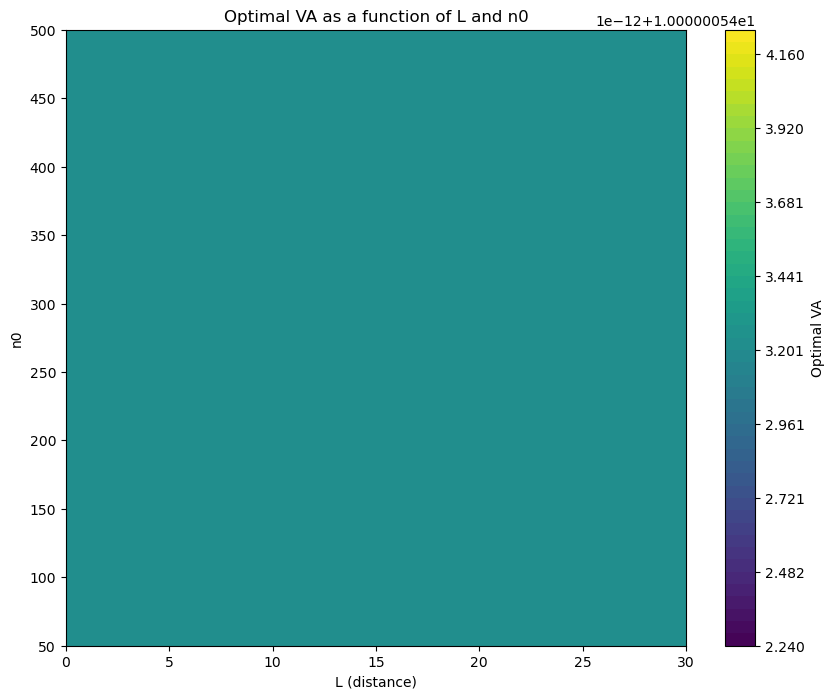

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Generate mesh grids for L and n0
L_values = np.linspace(0, 30, 500)  # More points for smoother plotting
n0_values = [50, 100, 500]

# Calculate optimal VA for each combination of L and n0
VA_mesh = np.array([[maximize_VA(L, n0)[0] for n0 in n0_values] for L in L_values])

# Create mesh grid for plotting
L_mesh, n0_mesh = np.meshgrid(L_values, n0_values)

# Plot the results using contourf
plt.figure(figsize=(10, 8))
plt.contourf(L_mesh, n0_mesh, VA_mesh.T, levels=50, cmap='viridis')
plt.colorbar(label='Optimal VA')  # Color bar to indicate the scale of optimal VA
plt.xlabel('L (distance)')
plt.ylabel('n0')
plt.title('Optimal VA as a function of L and n0')
plt.show()



In [86]:
def average_VA_for_n0(L_start, L_end, n0):
    # Filter results based on n0 and range of L
    filtered_results = [(opt_VA, L, n0_val, max_key_rate) for opt_VA, L, n0_val, max_key_rate in opt_results if L_start <= L <= L_end and n0_val == n0]
    
    # Check if there are any results after filtering
    if not filtered_results:
        return None  # Return None if no results found

    # Extract VA values from filtered results
    VA_values = [opt_VA for opt_VA, _, _, _ in filtered_results]
    
    # Calculate average VA
    average_VA = np.mean(VA_values)
    return average_VA


# Define the range of L for which you want to calculate the average VA
L_start = 0
L_end = 30

# Calculate average VA for each n0 in n0_values
for n0 in n0_values:
    avg_VA = average_VA_for_n0(L_start, L_end, n0)
    
    # Check if avg_VA is not None to avoid printing None
    if avg_VA is not None:
        print(f"Average VA for n0={n0} and L in range [{L_start}, {L_end}]: {avg_VA:.4f}")
    else:
        print(f"No results found for n0={n0} in the range [{L_start}, {L_end}]")


Average VA for n0=50 and L in range [0, 30]: 10.0000
Average VA for n0=100 and L in range [0, 30]: 10.0000
Average VA for n0=500 and L in range [0, 30]: 10.0000


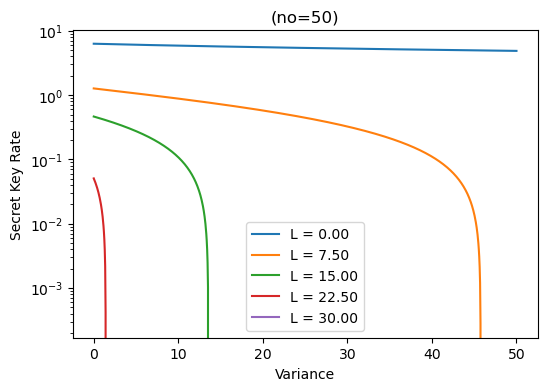

<Figure size 640x480 with 0 Axes>

In [87]:
#Define the n0 value, the range of lengths, and the desired variance values
n0_value = 50 # Example n0 value
L_values = np.linspace(0, 30, 5)  # Example range of lengths
variance_values = np.linspace(0.0, 50, 1000)  # Example desired variance values

plt.figure(figsize=(6, 4))

for L in L_values:
    secret_key_rates = []
    
    for variance in variance_values:
        secret_key_rate_value = key_rate_asym(variance,0.1, L, n0_value)
        if not np.isnan(secret_key_rate_value):
            secret_key_rates.append(secret_key_rate_value)
    
    plt.semilogy(variance_values, secret_key_rates, label=f'L = {L:.2f}')

plt.xlabel('Variance')
plt.ylabel('Secret Key Rate')
plt.title('(no=50)')
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig('plot.pdf') 


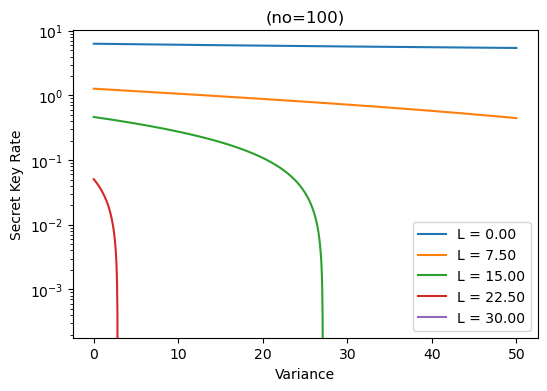

<Figure size 640x480 with 0 Axes>

In [88]:
#Define the n0 value, the range of lengths, and the desired variance values
n0_value = 100 # Example n0 value
L_values = np.linspace(0, 30, 5)  # Example range of lengths
variance_values = np.linspace(0.0, 50, 1000)  # Example desired variance values

plt.figure(figsize=(6, 4))

for L in L_values:
    secret_key_rates = []
    
    for variance in variance_values:
        secret_key_rate_value = key_rate_asym(variance,0.1, L, n0_value)
        if not np.isnan(secret_key_rate_value):
            secret_key_rates.append(secret_key_rate_value)
    
    plt.semilogy(variance_values, secret_key_rates, label=f'L = {L:.2f}')

plt.xlabel('Variance')
plt.ylabel('Secret Key Rate')
plt.title('(no=100)')
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig('plot.pdf') 


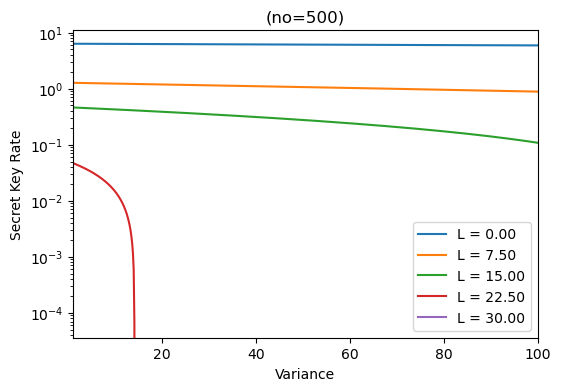

<Figure size 640x480 with 0 Axes>

In [89]:
#Define the n0 value, the range of lengths, and the desired variance values
n0_value = 500 # Example n0 value
L_values = np.linspace(0, 30, 5)  # Example range of lengths
variance_values = np.linspace(0.0, 150, 1000)  # Example desired variance values

plt.figure(figsize=(6, 4))

for L in L_values:
    secret_key_rates = []
    
    for variance in variance_values:
        secret_key_rate_value = key_rate_asym(variance,0.1, L, n0_value)
        if not np.isnan(secret_key_rate_value):
            secret_key_rates.append(secret_key_rate_value)
    
    plt.semilogy(variance_values, secret_key_rates, label=f'L = {L:.2f}')

plt.xlabel('Variance')
plt.ylabel('Secret Key Rate')
plt.title('(no=500)')
plt.xlim([1, 100])
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig('plot.pdf') 


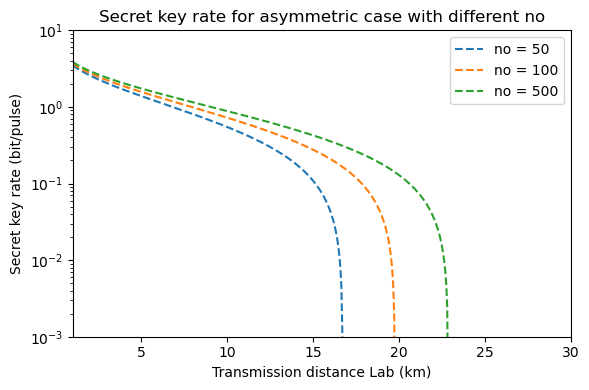

In [90]:
import numpy as np
import matplotlib.pyplot as plt
L_AB_values = np.linspace(1, 30, 500)
Va=10
# Define a list of n0 values to compare
n0_values = [50, 100, 500]  # Add more values of n0 if desired

plt.figure(figsize=(6, 4))

# Loop over each n0 value and calculate the corresponding key rates
for n0 in n0_values:
    key_rates = [key_rate_asym(Va, 0.1, i, n0) for i in L_AB_values]

    # Ensure all values in key_rates are positive for log scaling
    key_rates = [rate if rate > 0 else 10**-10 for rate in key_rates]  # Replace non-positive values

    # Plot key rates for the current n0 value
    plt.semilogy(L_AB_values, key_rates, label=f"no = {n0}", linestyle="--")

# Customize the plot
plt.xlabel("Transmission distance Lab (km)")
plt.ylabel("Secret key rate (bit/pulse)")
plt.title("Secret key rate for asymmetric case with different no")
plt.legend()
plt.ylim([10 ** -3, 10 ** 1])  # Adjusted to allow small positive values
plt.xlim([1, 30])
plt.tight_layout()
plt.show()


In [95]:
def key_rate_sym(Va,L,no):
    alpha=0.2
    wa=1
    wb=1
    T=10**(-alpha*L/10)
    vel=0.1
    nd=0.5
    e0=0.01
    k=(1-T)*wa+(1-T)*wb
    u=2*np.sqrt((1-T)*(1-T))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    lamb=k-u*g 
    k=(1-T)*wa+(1-T)*wb
    u=2*np.sqrt((1-T)*(1-T))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    V=Va+1
    v=np.sqrt((T+lamb)*(T+lamb))/T 
    ep=2*((2*Va/(no*nd))*(1+vel)-Va/no)
    Ee=e0+ep
    chi=2*(T+T)/(T*T)+Ee
    R2=h(v)+np.log2(8*T/((np.e)**2*chi*np.sqrt(lamb*lamb)))
    return R2

def key_rate_symA(Va,L,no):
    alpha=0.2
    wa=1
    wb=1
    T=10**(-alpha*L/10)
    vel=0.1
    nd=0.5
    e0=0.01
    k=(1-T)*wa+(1-T)*wb
    u=2*np.sqrt((1-T)*(1-T))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    lamb=k-u*g 
    k=(1-T)*wa+(1-T)*wb
    u=2*np.sqrt((1-T)*(1-T))
    g=min(np.sqrt((1-wa)*(1+wb)),np.sqrt((1+wa)*(1-wb)))
    V=Va+1
    v=np.sqrt((T+lamb)*(T+lamb))/T 
    ep=2*((2*Va/(no*nd))*(1+vel)-Va/no)
    Ee=e0+ep
    chi=2*(T+T)/(T*T)+Ee
    R2=h(v)+np.log2(8*T/((np.e)**2*chi*np.sqrt(lamb*lamb)))
    return -R2

In [98]:
from functools import partial
from scipy.optimize import minimize_scalar

# Define the function to maximize VA for given L and n0
def maximize_VA1(L, n0):
    # Create a new function that only depends on Va (Lac and Lcb are set)
    f_fixed_Ln0 = partial(key_rate_symA, L=L, no=n0)
    
    # Use minimize_scalar to find the minimum of the negative key rate
    result = minimize_scalar(f_fixed_Ln0, bounds=(10, 80), method='bounded')
    
    return result.x, result.fun  # Return the optimal Va and the corresponding key rate

# Iterate over all combinations of L and n0 from their lists
opt_results = []
L_values = np.linspace(0, 30, 500)
n0_values = [50, 100, 500]

for L in L_values:
    for n0 in n0_values:
        opt_VA, max_key_rate = maximize_VA1(L, n0)
        opt_results.append((opt_VA, L, n0, max_key_rate))

# Now you have opt_results containing (opt_VA, L, n0, max_key_rate)


C:\Users\msphy2212\AppData\Local\Temp\ipykernel_7992\109519975.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  R2=h(v)+np.log2(8*T/((np.e)**2*chi*np.sqrt(lamb*lamb)))
c:\Users\msphy2212\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2289: RuntimeWarning: invalid value encountered in scalar subtract
  r = (xf - nfc) * (fx - ffulc)
c:\Users\msphy2212\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:2290: RuntimeWarning: invalid value encountered in scalar subtract
  q = (xf - fulc) * (fx - fnfc)


C:\Users\msphy2212\AppData\Local\Temp\ipykernel_7992\109519975.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  R2=h(v)+np.log2(8*T/((np.e)**2*chi*np.sqrt(lamb*lamb)))


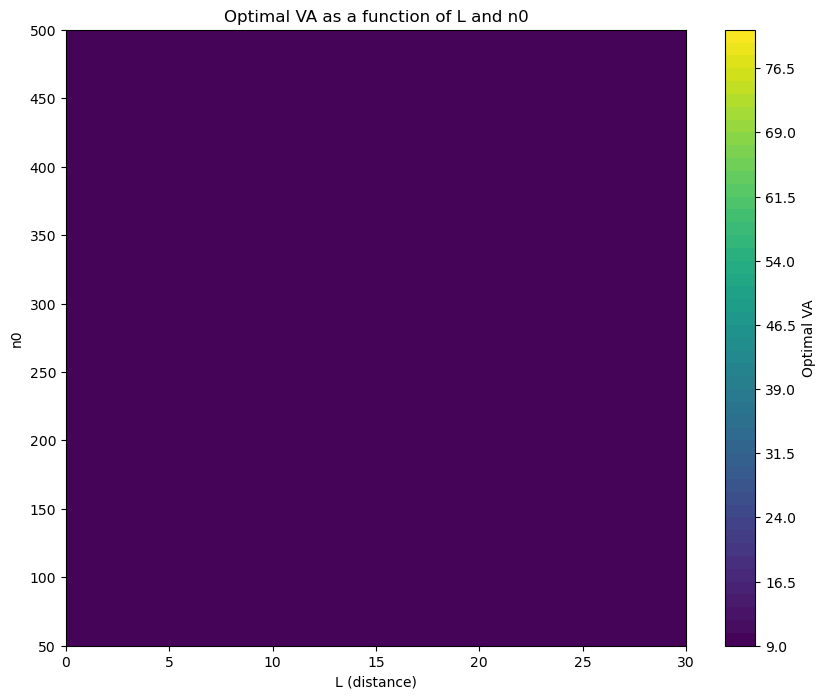

In [100]:
import numpy as np
import matplotlib.pyplot as plt

# Generate mesh grids for L and n0
L_values = np.linspace(0, 30, 500)  # More points for smoother plotting
n0_values = [50, 100, 500]

# Calculate optimal VA for each combination of L and n0
VA_mesh = np.array([[maximize_VA1(L, n0)[0] for n0 in n0_values] for L in L_values])

# Create mesh grid for plotting
L_mesh, n0_mesh = np.meshgrid(L_values, n0_values)

# Plot the results using contourf
plt.figure(figsize=(10, 8))
plt.contourf(L_mesh, n0_mesh, VA_mesh.T, levels=50, cmap='viridis')
plt.colorbar(label='Optimal VA')  # Color bar to indicate the scale of optimal VA
plt.xlabel('L (distance)')
plt.ylabel('n0')
plt.title('Optimal VA as a function of L and n0')
plt.show()



In [101]:
def average_VA_for_n0(L_start, L_end, n0):
    # Filter results based on n0 and range of L
    filtered_results = [(opt_VA, L, n0_val, max_key_rate) for opt_VA, L, n0_val, max_key_rate in opt_results if L_start <= L <= L_end and n0_val == n0]
    
    # Check if there are any results after filtering
    if not filtered_results:
        return None  # Return None if no results found

    # Extract VA values from filtered results
    VA_values = [opt_VA for opt_VA, _, _, _ in filtered_results]
    
    # Calculate average VA
    average_VA = np.mean(VA_values)
    return average_VA


# Define the range of L for which you want to calculate the average VA
L_start = 0
L_end = 30

# Calculate average VA for each n0 in n0_values
for n0 in n0_values:
    avg_VA = average_VA_for_n0(L_start, L_end, n0)
    
    # Check if avg_VA is not None to avoid printing None
    if avg_VA is not None:
        print(f"Average VA for n0={n0} and L in range [{L_start}, {L_end}]: {avg_VA:.4f}")
    else:
        print(f"No results found for n0={n0} in the range [{L_start}, {L_end}]")


Average VA for n0=50 and L in range [0, 30]: 10.1400
Average VA for n0=100 and L in range [0, 30]: 10.1400
Average VA for n0=500 and L in range [0, 30]: 10.1400


C:\Users\msphy2212\AppData\Local\Temp\ipykernel_7992\109519975.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  R2=h(v)+np.log2(8*T/((np.e)**2*chi*np.sqrt(lamb*lamb)))


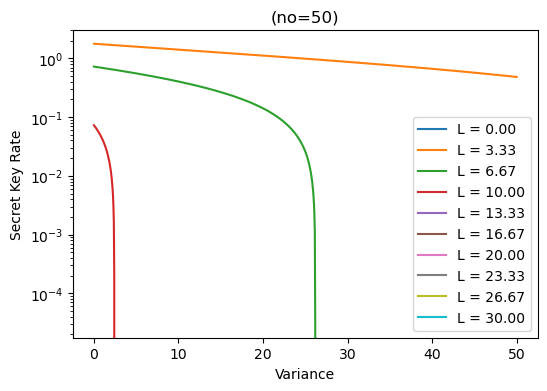

<Figure size 640x480 with 0 Axes>

In [106]:
#Define the n0 value, the range of lengths, and the desired variance values
n0_value = 50 # Example n0 value
L_values = np.linspace(0, 30, 10)  # Example range of lengths
variance_values = np.linspace(0.0, 50, 1000)  # Example desired variance values

plt.figure(figsize=(6, 4))

for L in L_values:
    secret_key_rates = []
    
    for variance in variance_values:
        secret_key_rate_value = key_rate_sym(variance, L, n0_value)
        if not np.isnan(secret_key_rate_value):
            secret_key_rates.append(secret_key_rate_value)
    
    plt.semilogy(variance_values, secret_key_rates, label=f'L = {L:.2f}')

plt.xlabel('Variance')
plt.ylabel('Secret Key Rate')
plt.title('(no=50)')
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig('plot.pdf') 


C:\Users\msphy2212\AppData\Local\Temp\ipykernel_7992\109519975.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  R2=h(v)+np.log2(8*T/((np.e)**2*chi*np.sqrt(lamb*lamb)))


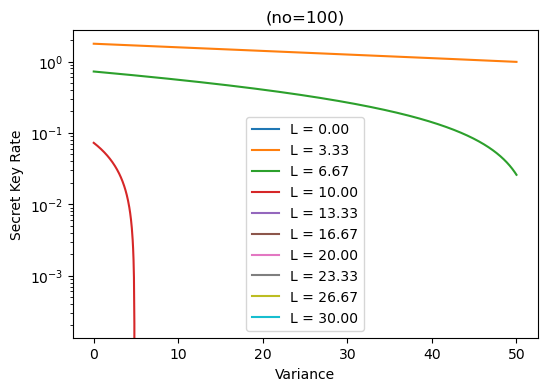

<Figure size 640x480 with 0 Axes>

In [109]:
#Define the n0 value, the range of lengths, and the desired variance values
n0_value = 100 # Example n0 value
L_values = np.linspace(0, 30, 10)  # Example range of lengths
variance_values = np.linspace(0.0, 50, 1000)  # Example desired variance values

plt.figure(figsize=(6, 4))

for L in L_values:
    secret_key_rates = []
    
    for variance in variance_values:
        secret_key_rate_value = key_rate_sym(variance, L, n0_value)
        if not np.isnan(secret_key_rate_value):
            secret_key_rates.append(secret_key_rate_value)
    
    plt.semilogy(variance_values, secret_key_rates, label=f'L = {L:.2f}')

plt.xlabel('Variance')
plt.ylabel('Secret Key Rate')
plt.title('(no=100)')
plt.legend()
#plt.grid(True)
plt.show()
plt.savefig('plot.pdf') 


C:\Users\msphy2212\AppData\Local\Temp\ipykernel_7992\109519975.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  R2=h(v)+np.log2(8*T/((np.e)**2*chi*np.sqrt(lamb*lamb)))


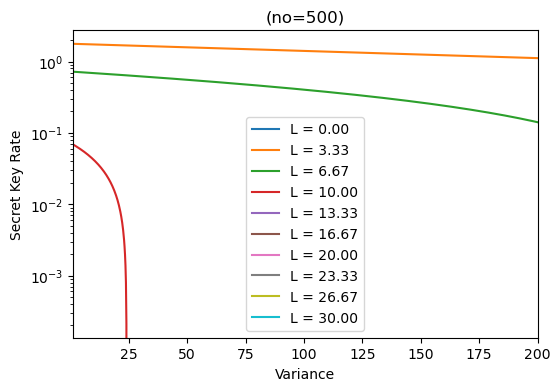

<Figure size 640x480 with 0 Axes>

In [115]:
#Define the n0 value, the range of lengths, and the desired variance values
n0_value = 500 # Example n0 value
L_values = np.linspace(0, 30, 10)  # Example range of lengths
variance_values = np.linspace(0.0, 200, 1000)  # Example desired variance values

plt.figure(figsize=(6, 4))

for L in L_values:
    secret_key_rates = []
    
    for variance in variance_values:
        secret_key_rate_value = key_rate_sym(variance, L, n0_value)
        if not np.isnan(secret_key_rate_value):
            secret_key_rates.append(secret_key_rate_value)
    
    plt.semilogy(variance_values, secret_key_rates, label=f'L = {L:.2f}')

plt.xlabel('Variance')
plt.ylabel('Secret Key Rate')
plt.title('(no=500)')
plt.legend()
plt.xlim([1, 200])
#plt.grid(True)
plt.show()
plt.savefig('plot.pdf') 


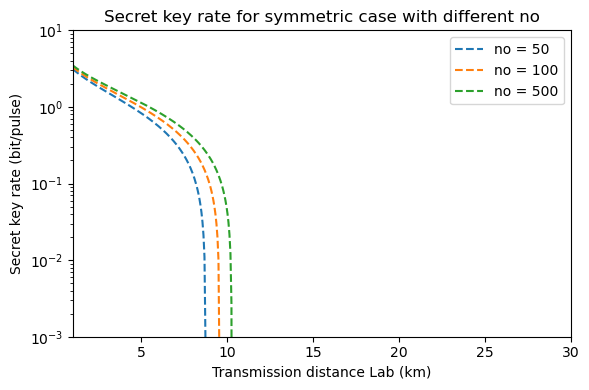

In [118]:
import numpy as np
import matplotlib.pyplot as plt
L_AB_values = np.linspace(1, 30, 500)
Va=10
# Define a list of n0 values to compare
n0_values = [50, 100, 500]  # Add more values of n0 if desired

plt.figure(figsize=(6, 4))

# Loop over each n0 value and calculate the corresponding key rates
for n0 in n0_values:
    key_rates = [key_rate_sym(Va, i, n0) for i in L_AB_values]

    # Ensure all values in key_rates are positive for log scaling
    key_rates = [rate if rate > 0 else 10**-10 for rate in key_rates]  # Replace non-positive values

    # Plot key rates for the current n0 value
    plt.semilogy(L_AB_values, key_rates, label=f"no = {n0}", linestyle="--")

# Customize the plot
plt.xlabel("Transmission distance Lab (km)")
plt.ylabel("Secret key rate (bit/pulse)")
plt.title("Secret key rate for symmetric case with different no")
plt.legend()
plt.ylim([10 ** -3, 10 ** 1])  # Adjusted to allow small positive values
plt.xlim([1, 30])
plt.tight_layout()
plt.show()
